In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,signal

# Setup
We must first create a Poisson-distributed background where $\mu$=100. 

Note that the distribution does appear Gaussian. This is due to the known fact that a Poisson distribution will appear Gaussian as $\mu$ gets large.

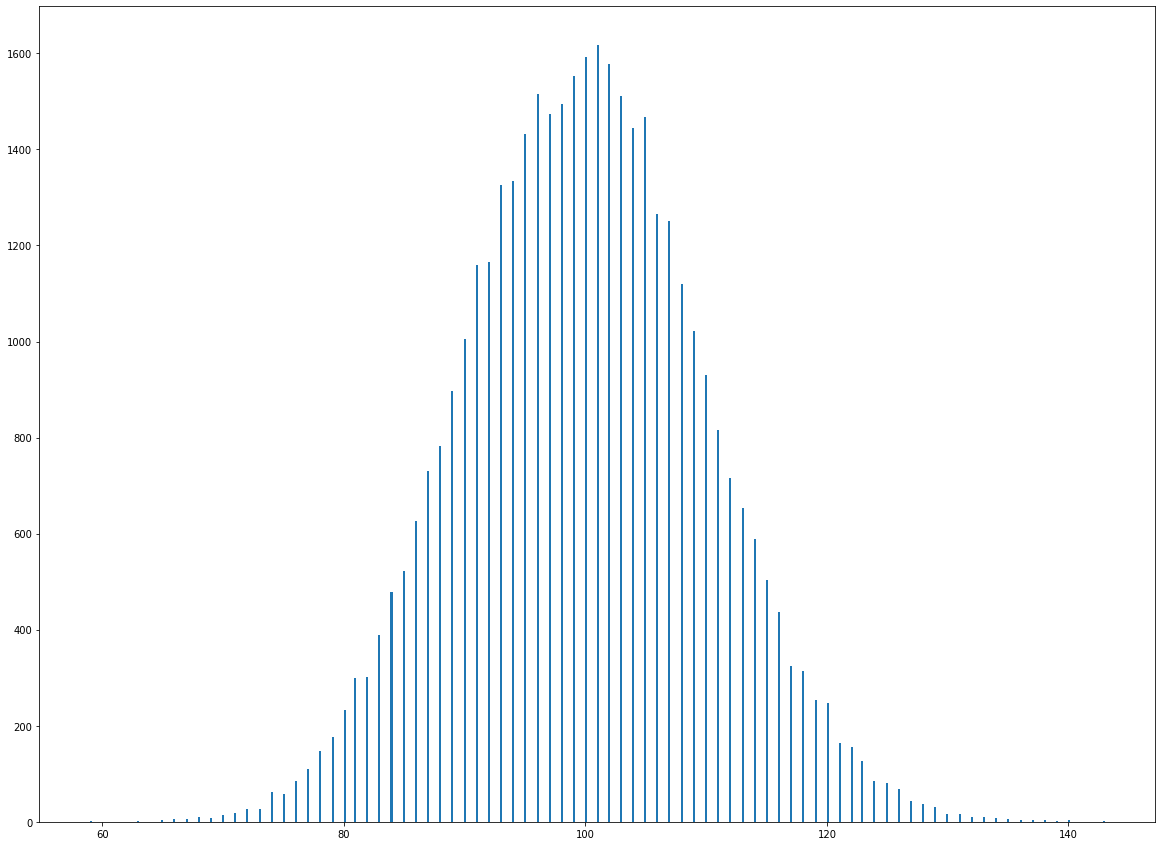

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
mu1=100
dist=np.random.poisson(mu1,40000)
ax.hist(dist,bins=500)
plt.show()

# Problem 1
## Determine where 5$\sigma$ sensitivity threshold is



In [10]:
prob=stats.poisson.cdf(154, mu=mu1)
ppf = stats.norm.ppf(prob)
print(ppf)

5.057503505878237


Based on the above, a signal of approximately 154 gives a 5$\sigma$ value, and a signal of approximately 46 gives a -5$\sigma$ value.

# Problem 2
## Inject high-signal data
We want to create a signal in the 8$\sigma$-30$\sigma$ range, and inject it into our background many times. From there, we want to explore the data. 

For this problem, I will use a signal of 193, which has a $\sigma$ = 8.2, and I will insert it 1000 times. 

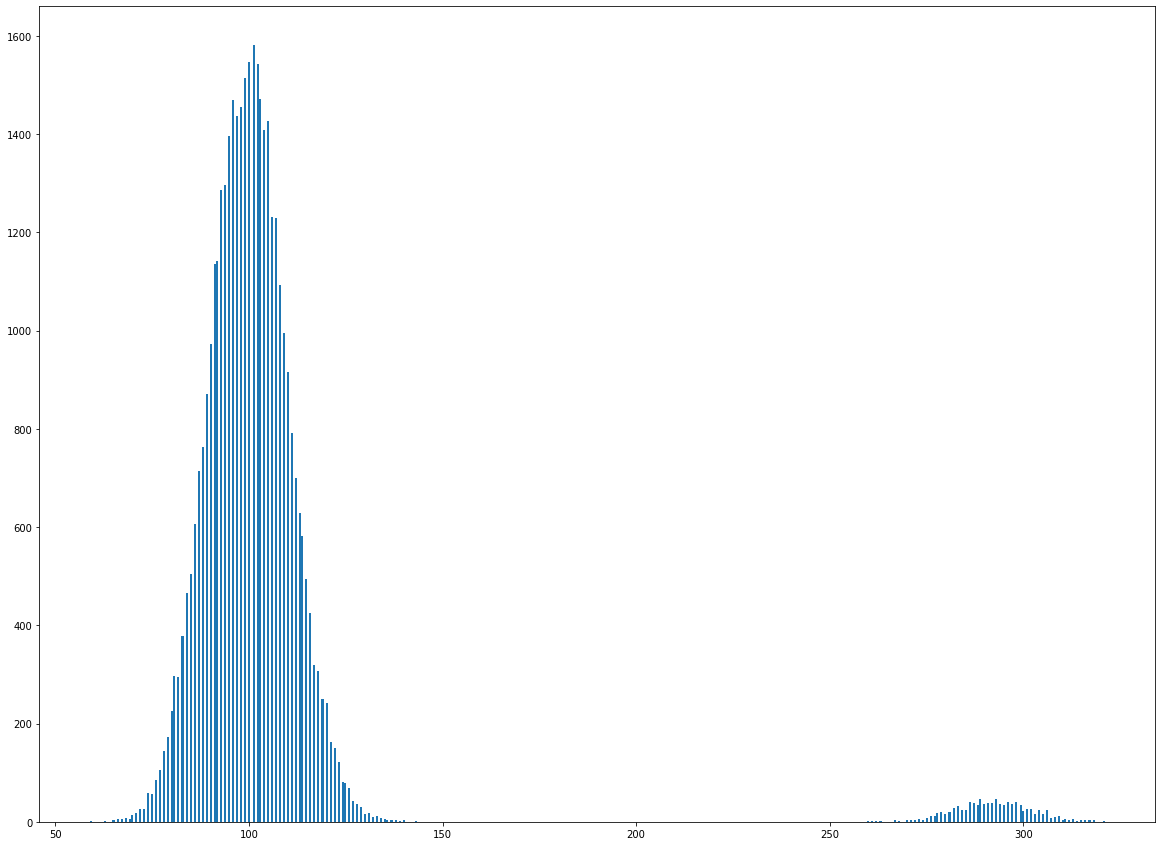

In [39]:
distWBad=dist
for i in range(0,1000):
    distWBad[i]=distWBad[i]+193
fig, ax = plt.subplots(1, 1, figsize=(20,15))
ax.hist(distWBad,bins=500)
plt.show()

### Part A
In the above, we can clearly see the 1000 values which were selected to have 193 added to them - it's the small distribution to the right. 

We can make an educated guess stating that the mean of this smaller distribution is 293. The reason for this is because the most common value that would be selected from the original distribution would be 100 (because that's the mean), and each value had 193 added to it.  

I would expect the brightness of my signal to be equivalent to the ratio of the areas. In this case, it would be 1/40th the brightness because I took a random sampling of 1000 from a total of 40000 signals.

### Part B 
The observed value is stronger than the true injected signal. It wouldn't make sense if the observed value's mean was the same as the injected value, nor would it make sense if it was less than the injected value.  

This is because there is already signal (the background) so we should not expect the observed signal's mean to be anywhere other than *the mean of the original* + *the injected value*. Related to this, the values that create the resulting distribution will also be as evenly distributed around the observed value's mean as they were around the original mean of 100. 

The distribution of the observed signal is Poisson. A randomly selected subset of a distribution is going to be the same distribution as the pool it was selected from. 

The distribution you're drawing from is made up of values that have some probability of existing, which is quantified by occurence. If you randomly select from that distribution, those values have the same probability of being selected as they did existing because they occur more frequently than the other values. The Liklihood of randomly selecting the other values is proportional to their probabilities. Because of this, the subset will have the same distribution as the main set.

## Problem 3
In this problem, we will be exploring the effects of injecting a range of signals into our background data. The range should be anywhere between 0$\sigma$ and 30$\sigma$+. 

To do this, I will generate a random list of 1000 integers on a scale of 100-1000. 

In [35]:
vals=[]
for i in range(0,1000):
    val=np.random.randint(100,high=1000)
    vals.append(val)

Below shows a 2D histogram of the injected signal vs observed signal. 

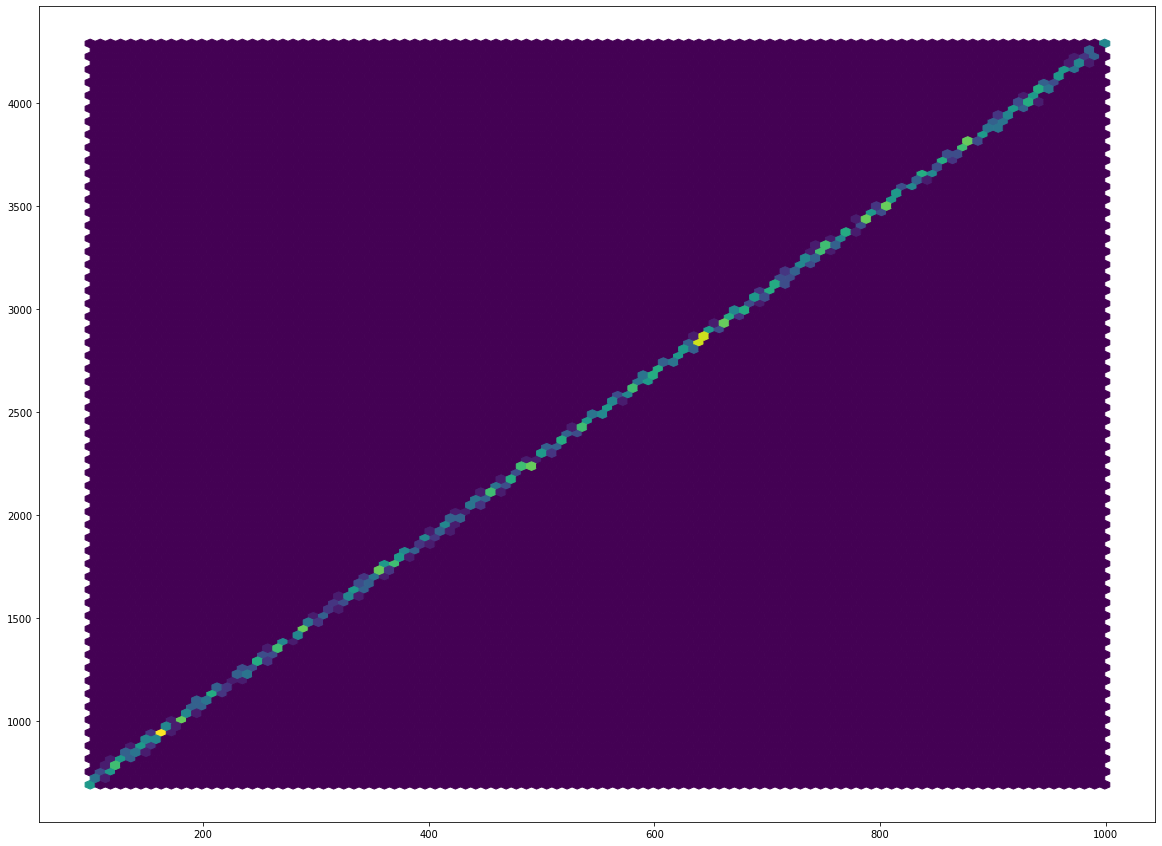

In [43]:
dist2WBad=dist
distBadObs=[]
for i in range(0,1000):
    dist2WBad[i]=dist2WBad[i]+vals[i]
    distBadObs.append(dist2WBad[i])
fig, ax = plt.subplots(1, 1, figsize=(20,15))
plt.hexbin(vals,distBadObs)
plt.show()

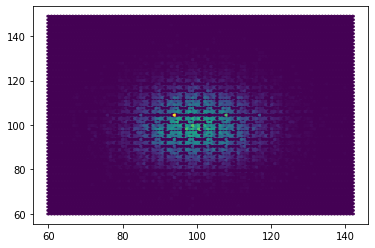

In [34]:
x = np.random.poisson(mu1,40000)
y = np.random.poisson(mu1,40000)
plt.hexbin(x,y)

plt.show()